# BEATS raytracing: Optics - DMM slope error and d-spacing gradient
Raytrcing calculations for the BEATS DMM
### Mirror + coating comparison: 
* Slope error: 0.5 urad VS 0.3 urad (same roughness; no gradient) 
* Gradient VS no gradient (slope error 0.3 urad) 
* [W/B4C]100 @ 40 keV 
* [Ru/B4C]65 @ 18 keV 

______________________________________________________

Author:         Gianluca Iori (gianthk.iori@gmail.com)

Created on:   06/09/2020

Last update:  06/09/2020
______________________________________________________


In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as sc
from pandas_ods_reader import read_ods
import h5py
from scipy.constants import c, h

In [6]:
%matplotlib inline
font = {'weight' : 'normal',
        'size'   : 12}
matplotlib.rc('font', **font)

#### Read beam profiles @ 43 m after DMM (from Shadow)

In [53]:
source_plots_dir = './DMM/slope_error/'
WB4C_n100_d3nm_05urad_40keV = np.load(source_plots_dir + 'WB4C_n100_d3nm_0.5urad_40keV.npy')
WB4C_n100_d3nm_05urad_40keV_X = pd.read_csv(source_plots_dir + 'WB4C_n100_d3nm_0.5urad_40keV_X.csv', sep=',', names=['X', 'I'], skiprows=[0])
WB4C_n100_d3nm_05urad_40keV_Y = pd.read_csv(source_plots_dir + 'WB4C_n100_d3nm_0.5urad_40keV_Y.csv', sep=',', names=['Y', 'I'], skiprows=[0])

WB4C_n100_d3nm_03urad_40keV = np.load(source_plots_dir + 'WB4C_n100_d3nm_0.3urad_40keV.npy')
WB4C_n100_d3nm_03urad_40keV_X = pd.read_csv(source_plots_dir + 'WB4C_n100_d3nm_0.3urad_40keV_X.csv', sep=',', names=['X', 'I'], skiprows=[0])
WB4C_n100_d3nm_03urad_40keV_Y = pd.read_csv(source_plots_dir + 'WB4C_n100_d3nm_0.3urad_40keV_Y.csv', sep=',', names=['Y', 'I'], skiprows=[0])

RuB4C_n65_d4nm_03urad_15keV = np.load(source_plots_dir + 'RuB4C_n65_d4nm_0.3urad_15keV.npy')
RuB4C_n65_d4nm_03urad_15keV_X = pd.read_csv(source_plots_dir + 'RuB4C_n65_d4nm_0.3urad_15keV_X.csv', sep=',', names=['X', 'I'], skiprows=[0])
RuB4C_n65_d4nm_03urad_15keV_Y = pd.read_csv(source_plots_dir + 'RuB4C_n65_d4nm_0.3urad_15keV_Y.csv', sep=',', names=['Y', 'I'], skiprows=[0])

RuB4C_n65_d4nm_05urad_15keV = np.load(source_plots_dir + 'RuB4C_n65_d4nm_0.5urad_15keV.npy')
RuB4C_n65_d4nm_05urad_15keV_X = RuB4C_n65_d4nm_03urad_15keV_X
RuB4C_n65_d4nm_05urad_15keV_Y = RuB4C_n65_d4nm_03urad_15keV_Y

### STRIPE 1: [W/B4C]$_{100}$ - d = 3.0 nm 

#### Plot beam snapshots at 43 m after DMM

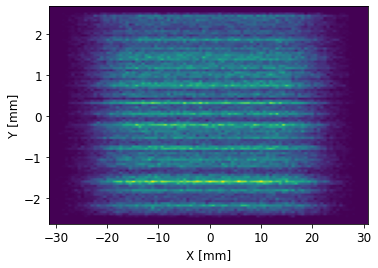

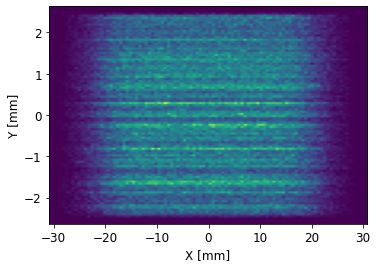

In [58]:
f, ax = plt.subplots()
plt.imshow(WB4C_n100_d3nm_05urad_40keV, extent=[WB4C_n100_d3nm_05urad_40keV_X['X'].min()*0.001,WB4C_n100_d3nm_05urad_40keV_X['X'].max()*0.001,WB4C_n100_d3nm_05urad_40keV_Y['Y'].min()*0.001,WB4C_n100_d3nm_05urad_40keV_Y['Y'].max()*0.001], aspect=8)
plt.xlabel('X [mm]')
plt.ylabel('Y [mm]')
# ax.annotate('8keV; 7.4 m', xy=(-60, 2), xytext=(-60, 2), fontsize='xx-large', c='w')
f.savefig("beam_snapshot_40keV_43m_WB4C_05urad.png", bbox_inches='tight', dpi=600)

f, ax = plt.subplots()
plt.imshow(WB4C_n100_d3nm_03urad_40keV, extent=[WB4C_n100_d3nm_03urad_40keV_X['X'].min()*0.001,WB4C_n100_d3nm_03urad_40keV_X['X'].max()*0.001,WB4C_n100_d3nm_03urad_40keV_Y['Y'].min()*0.001,WB4C_n100_d3nm_03urad_40keV_Y['Y'].max()*0.001], aspect=8)
plt.xlabel('X [mm]')
plt.ylabel('Y [mm]')
# ax.annotate('8keV; 7.4 m', xy=(-60, 2), xytext=(-60, 2), fontsize='xx-large', c='w')
f.savefig("beam_snapshot_40keV_43m_WB4C_03urad.png", bbox_inches='tight', dpi=600)

#### Vertical beam profile

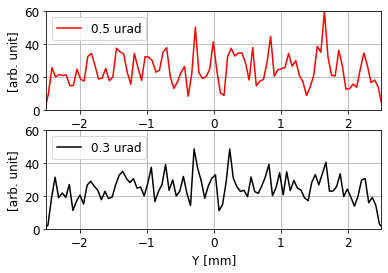

In [59]:
# norm = np.array([profile_7428mm_8keV[:,40:60].sum(axis=1).max(), profile_7428mm_20keV[:,40:60].sum(axis=1).max()])
f, ax = plt.subplots()
n=30
ax1=plt.subplot(2,1,1)
plt.plot(WB4C_n100_d3nm_05urad_40keV_Y['Y']*0.001, WB4C_n100_d3nm_05urad_40keV[:,n], 'r')
plt.xlabel('Y [mm]')
plt.ylabel('[arb. unit]')
plt.grid(True, which="both")
plt.legend(["0.5 urad"], loc='upper left')
ax1.set(xlim=(-2.5, 2.5), ylim=(0, 60))

ax2=plt.subplot(2,1,2)
plt.plot(WB4C_n100_d3nm_03urad_40keV_Y['Y']*0.001, WB4C_n100_d3nm_03urad_40keV[:,n], 'k')
plt.xlabel('Y [mm]')
plt.ylabel('[arb. unit]')
plt.grid(True, which="both")
plt.legend(["0.3 urad"], loc='upper left')
ax2.set(xlim=(-2.5, 2.5), ylim=(0, 60))

f.savefig("beam_profile_40keV_43m_WB4C_03VS05urad.png", bbox_inches='tight', dpi=600)

### STRIPE 2: [Ru/B4C]$_{65}$ - d = 4.0 nm 

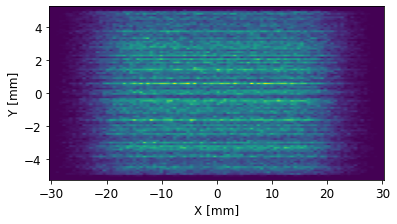

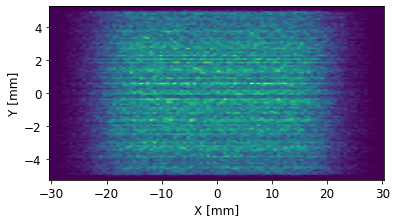

In [60]:
f, ax = plt.subplots()
plt.imshow(RuB4C_n65_d4nm_05urad_15keV, extent=[RuB4C_n65_d4nm_05urad_15keV_X['X'].min()*0.001,RuB4C_n65_d4nm_05urad_15keV_X['X'].max()*0.001,RuB4C_n65_d4nm_05urad_15keV_Y['Y'].min()*0.001,RuB4C_n65_d4nm_05urad_15keV_Y['Y'].max()*0.001], aspect=3)
plt.xlabel('X [mm]')
plt.ylabel('Y [mm]')
# ax.annotate('8keV; 7.4 m', xy=(-60, 2), xytext=(-60, 2), fontsize='xx-large', c='w')
f.savefig("beam_snapshot_15keV_43m_RuB4C_05urad.png", bbox_inches='tight', dpi=600)

f, ax = plt.subplots()
plt.imshow(RuB4C_n65_d4nm_03urad_15keV, extent=[RuB4C_n65_d4nm_03urad_15keV_X['X'].min()*0.001,RuB4C_n65_d4nm_03urad_15keV_X['X'].max()*0.001,RuB4C_n65_d4nm_03urad_15keV_Y['Y'].min()*0.001,RuB4C_n65_d4nm_03urad_15keV_Y['Y'].max()*0.001], aspect=3)
plt.xlabel('X [mm]')
plt.ylabel('Y [mm]')
# ax.annotate('8keV; 7.4 m', xy=(-60, 2), xytext=(-60, 2), fontsize='xx-large', c='w')
f.savefig("beam_snapshot_15keV_43m_RuB4C_03urad.png", bbox_inches='tight', dpi=600)

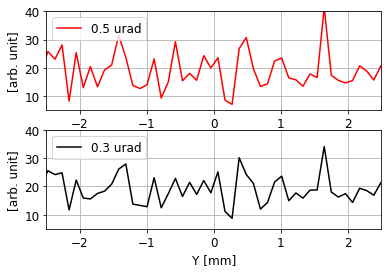

In [61]:
f, ax = plt.subplots()
n=30
ax1=plt.subplot(2,1,1)
plt.plot(RuB4C_n65_d4nm_05urad_15keV_Y['Y']*0.001, RuB4C_n65_d4nm_05urad_15keV[:,n], 'r')
plt.xlabel('Y [mm]')
plt.ylabel('[arb. unit]')
plt.grid(True, which="both")
plt.legend(["0.5 urad"], loc='upper left')
ax1.set(xlim=(-2.5, 2.5), ylim=(5, 40))

ax2=plt.subplot(2,1,2)
plt.plot(RuB4C_n65_d4nm_03urad_15keV_Y['Y']*0.001, RuB4C_n65_d4nm_03urad_15keV[:,n], 'k')
plt.xlabel('Y [mm]')
plt.ylabel('[arb. unit]')
plt.grid(True, which="both")
plt.legend(["0.3 urad"], loc='upper left')
ax2.set(xlim=(-2.5, 2.5), ylim=(5, 40))

f.savefig("beam_profile_15keV_43m_RuB4C_03VS05urad.png", bbox_inches='tight', dpi=600)